In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [43]:
# The digits dataset consists of 8x8 pixel images of digits that consist in training and target data sets.
digits = datasets.load_digits()
n_samples = len(digits.images)
dimention = digits.images[0].shape
print("The number of samples in digit dataset is {0:d}, the dimention of each image is {1:d}x{1:d}.".format(n_samples, dimention[0]))


The number of samples in digit dataset is 1797, the dimention of each image is 8x8.


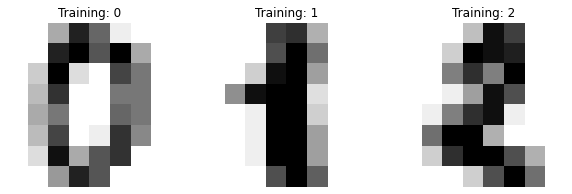

In [44]:
# Showing the first 3 images
_, fig = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
for ax, image, label in zip(fig, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title('Training: %i' % label)

In [45]:
# In order to classify the digital dataset, it is necessary to transform the images of 2D arrays into 1D.
# reshaping images into 1D arrays
data = digits.images.reshape((n_samples, -1))

# Defining the Multi-layer Perceptron (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
model = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10, 6), random_state=1, max_iter=600)

# Split data into 80% train and 20% test subsets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=False)

# Train the model MLPC using the training dataset
model.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = model.predict(X_test)

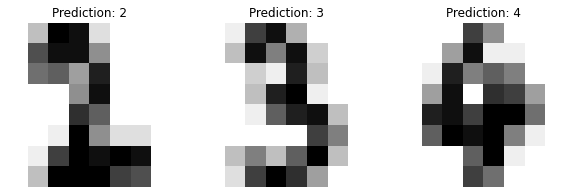

In [46]:
# Showing the first 3 predicted images
_, fig = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
for ax, image, prediction in zip(fig, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r,)
    ax.set_title(f'Prediction: {prediction}')

In [36]:
# priting a text report using classification metrics. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support
print(f"Classification report for classifier {model}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 6), max_iter=600,
              random_state=1):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        35
           1       0.89      0.69      0.78        36
           2       0.89      0.94      0.92        35
           3       0.81      0.59      0.69        37
           4       0.83      0.92      0.87        37
           5       0.77      0.92      0.84        37
           6       0.95      0.97      0.96        37
           7       0.92      0.92      0.92        36
           8       0.69      0.82      0.75        33
           9       0.94      0.89      0.92        37

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.87      0.86      0.86       360




Confusion matrix:
[[33  0  0  0  1  1  0  0  0  0]
 [ 0 25  1  1  2  3  0  0  2  2]
 [ 0  0 33  2  0  0  0  0  0  0]
 [ 0  1  3 22  0  3  1  2  5  0]
 [ 0  0  0  0 34  0  0  0  3  0]
 [ 2  1  0  0  0 34  0  0  0  0]
 [ 0  1  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  2  0  0 33  1  0]
 [ 0  0  0  2  2  1  1  0 27  0]
 [ 0  0  0  0  0  2  0  1  1 33]]


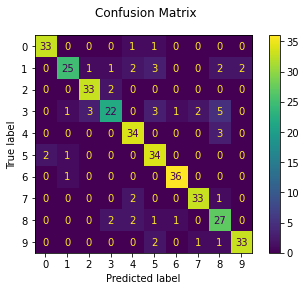

In [47]:
# Printing the confusion matrix

disp = metrics.plot_confusion_matrix(model, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [6]:
# https://pypi.org/project/keras/
# https://www.tensorflow.org/install/pip
from keras.models import Sequential
from keras.layers import Dense  

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [50]:
# define the keras model
model_deep = Sequential()
model_deep.add(Dense(12, input_dim=64, activation='relu'))
model_deep.add(Dense(8, activation='relu'))
model_deep.add(Dense(1, activation='sigmoid'))

# compiling the keras model
model_deep.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model_deep.fit(X_train, y_train, epochs=150, batch_size=10)

# evaluate the keras model
_, accuracy = model_deep.evaluate(X_test, y_test)

Epoch 1/150
144/144 [==============================] - 18s 2ms/step - loss: -141.8004 - accuracy: 0.1171
Epoch 2/150
144/144 [==============================] - 0s 2ms/step - loss: -2654.0974 - accuracy: 0.1092
Epoch 3/150
144/144 [==============================] - 0s 2ms/step - loss: -13935.8012 - accuracy: 0.0911
Epoch 4/150
144/144 [==============================] - 0s 2ms/step - loss: -42618.8312 - accuracy: 0.0915
Epoch 5/150
144/144 [==============================] - 0s 2ms/step - loss: -89912.5271 - accuracy: 0.1034
Epoch 6/150
144/144 [==============================] - 0s 2ms/step - loss: -174676.0298 - accuracy: 0.1072
Epoch 7/150
144/144 [==============================] - 0s 2ms/step - loss: -273399.4192 - accuracy: 0.1146
Epoch 8/150
144/144 [==============================] - 0s 2ms/step - loss: -421767.7265 - accuracy: 0.1009
Epoch 9/150
144/144 [==============================] - 0s 2ms/step - loss: -604605.5966 - accuracy: 0.1009
Epoch 10/150
144/144 [======================

In [52]:
# Printing the confusion matrix
prediction_deep = model_deep.predict(X_test)
matrix = metrics.confusion_matrix(y_test, prediction_deep)

NameError: name 'tf' is not defined